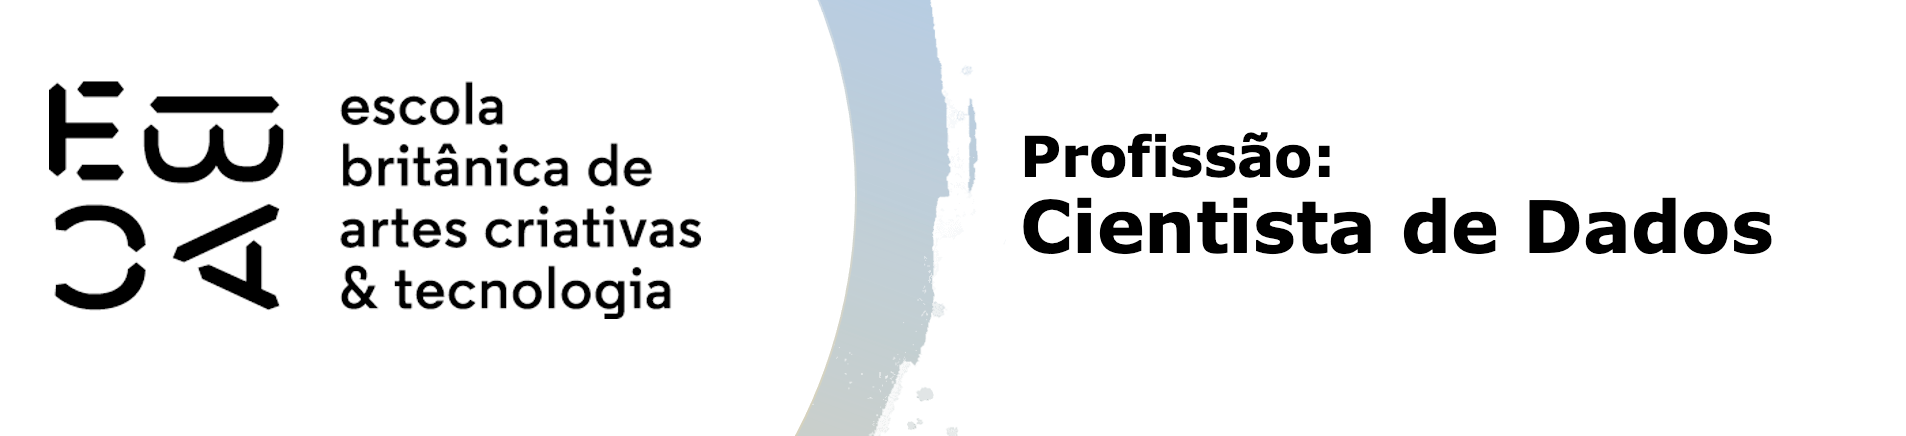

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Há dados faltantes? 
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# Transformar as coluna 'Weekend' e 'Revenue'
weekend_map = {True: 1, False: 0}
revenue_map = {True: 1, False: 0}

df['Weekend'] = df['Weekend'].map(weekend_map)
df['Revenue'] = df['Revenue'].map(revenue_map)

In [ ]:
# Transforme os dados categóricos em númericos
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

In [ ]:
df['Month'].unique()

In [ ]:
# Codificar a coluna 'Month' para valores númericos que ainda representem os meses
month_encoded = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,
                                 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
                                 'Nov': 11, 'Dec': 12})

df['Month'] = month_encoded
df['Month'].unique()

In [11]:
# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertendo de volta para DataFrame para fácil manipulação
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [12]:
# Verifique se há valores faltantes ou outliers
print(df.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

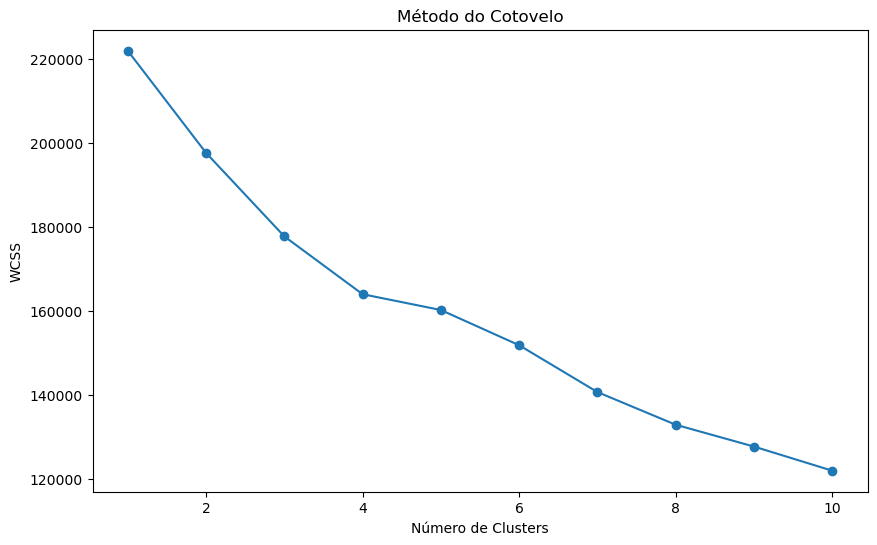

In [13]:
# Usar o método do cotovelo para encontrar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

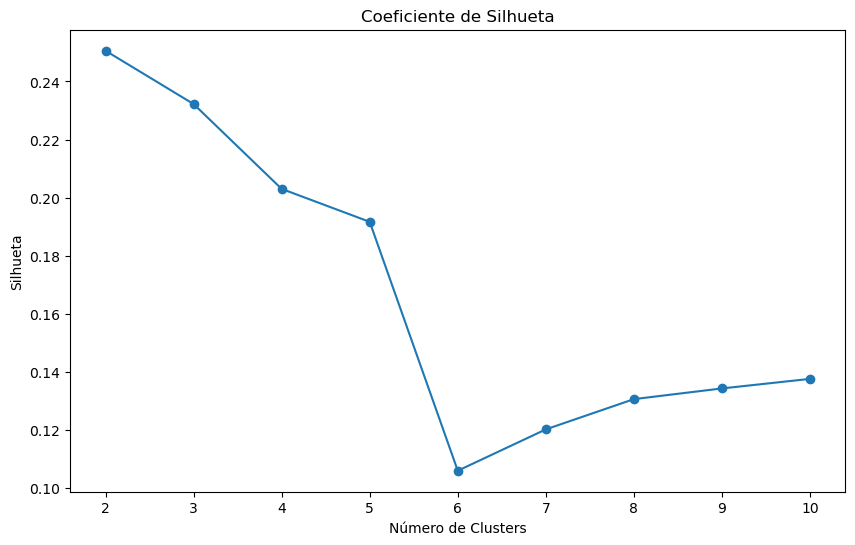

In [16]:
# Usar o coeficiente de silhueta para avaliar o número ideal de clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico do coeficiente de silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhueta')
plt.show()


In [34]:
# Escolher o número ideal de clusters com base nos métodos acima
n_clusters = 4  

# Aplicar K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Adicionar os rótulos de clusters ao DataFrame original
df['Cluster'] = cluster_labels


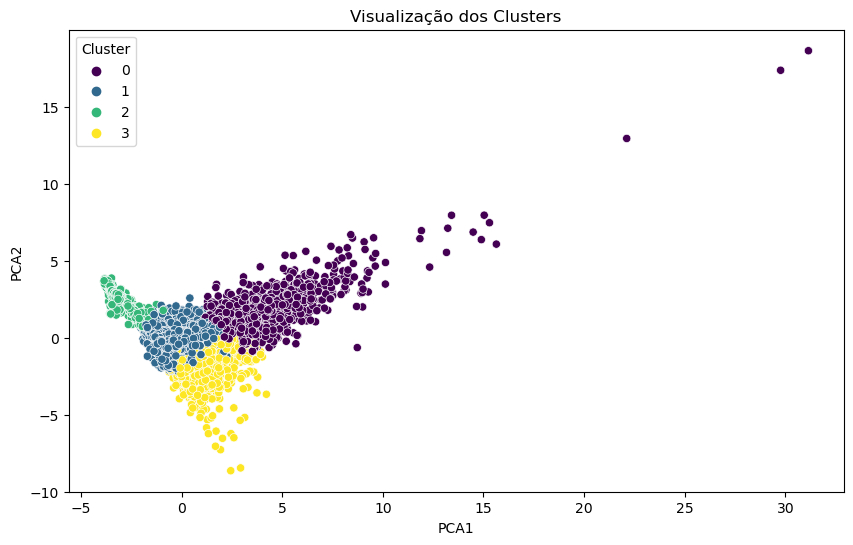

In [35]:
# Visualizar os clusters usando um par de variáveis (exemplo: PCA para redução de dimensionalidade)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Visualização dos Clusters')
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [42]:
# Aplicar K-means com 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(df_scaled)

# Aplicar K-means com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(df_scaled)


In [43]:
# Análise descritiva para 3 clusters
print("Análise Descritiva para 3 Clusters:")
descriptive_3 = df.groupby('Cluster_3').mean()
print(descriptive_3)

# Análise descritiva para 5 clusters
print("\nAnálise Descritiva para 5 Clusters:")
descriptive_5 = df.groupby('Cluster_5').mean()
print(descriptive_5)


Análise Descritiva para 3 Clusters:
           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                7.248362               302.931044       2.451459   
1                1.701731                50.700283       0.216430   
2                0.050047                 1.468492       0.016053   

           Informational_Duration  ProductRelated  ProductRelated_Duration  \
Cluster_3                                                                    
0                      205.906886       96.350208              3815.969957   
1                        8.259988       23.576626               861.144760   
2                        0.091785        3.144476                60.535219   

           BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType  \
Cluster_3                                                  ...                
0             0.006211   0.019350   10.468604    0.026921  ...     3.

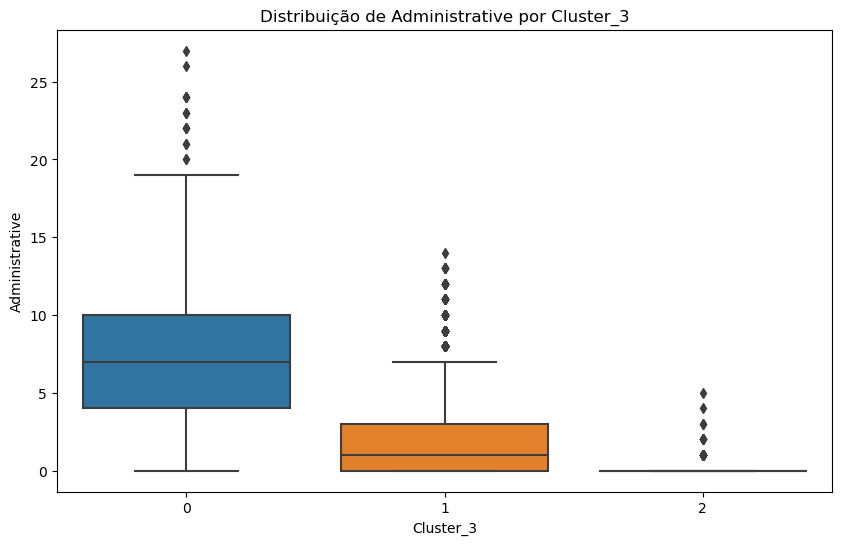

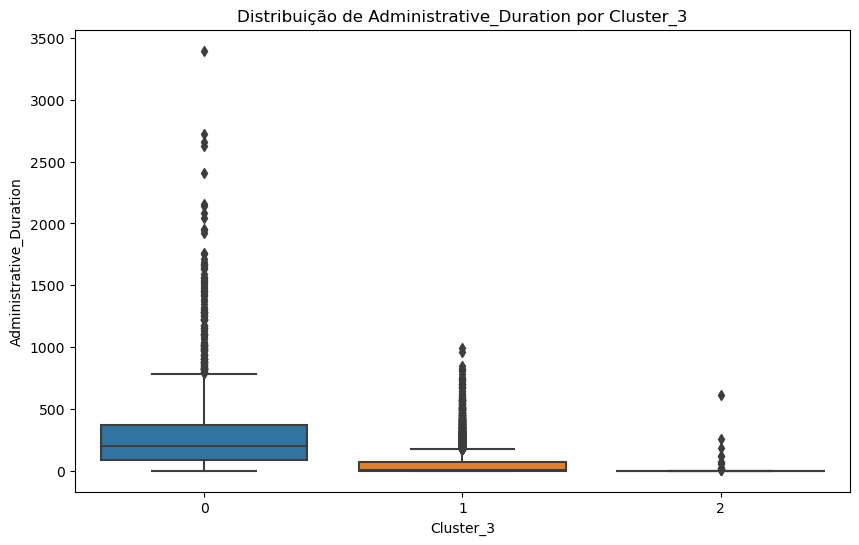

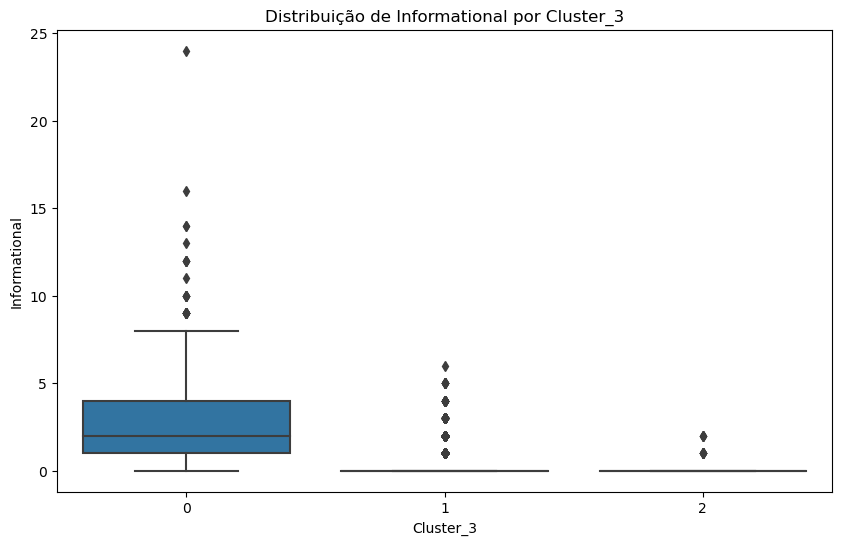

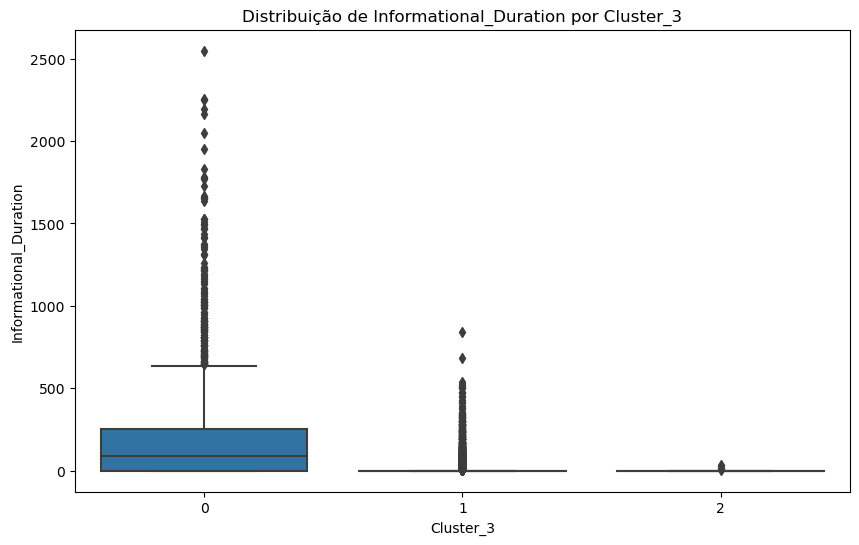

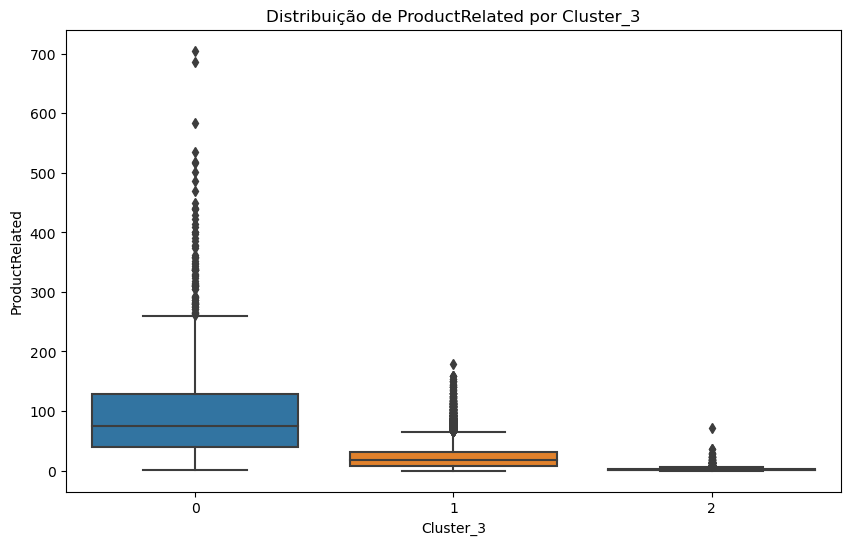

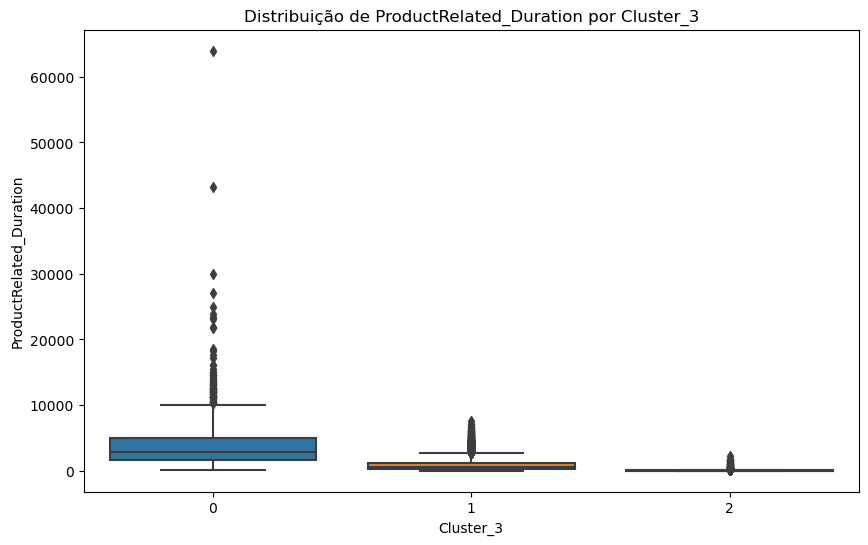

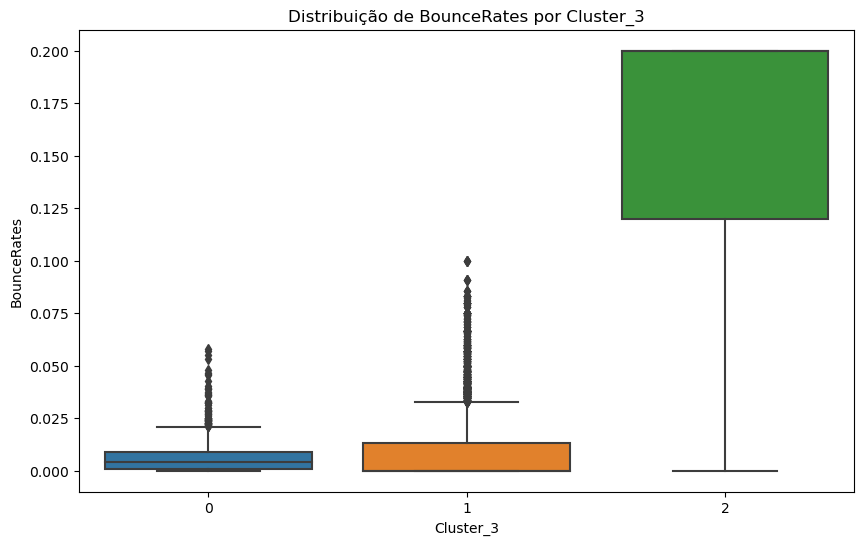

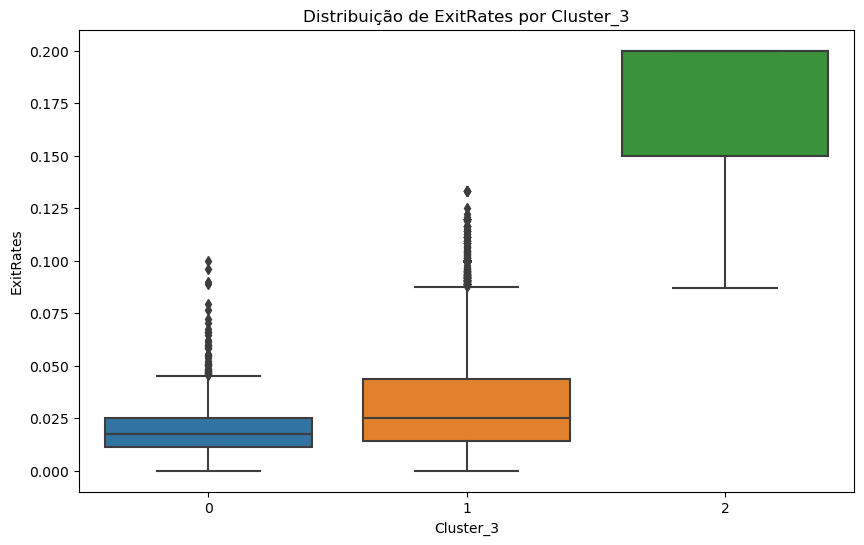

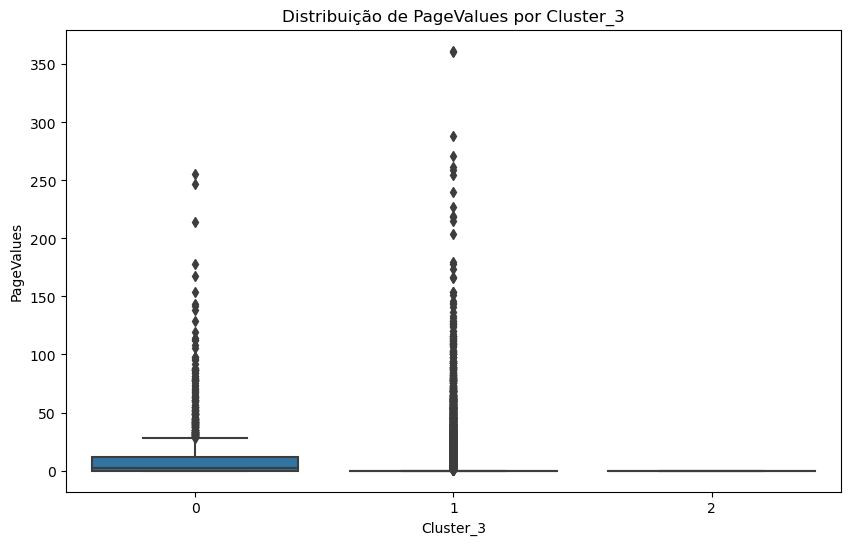

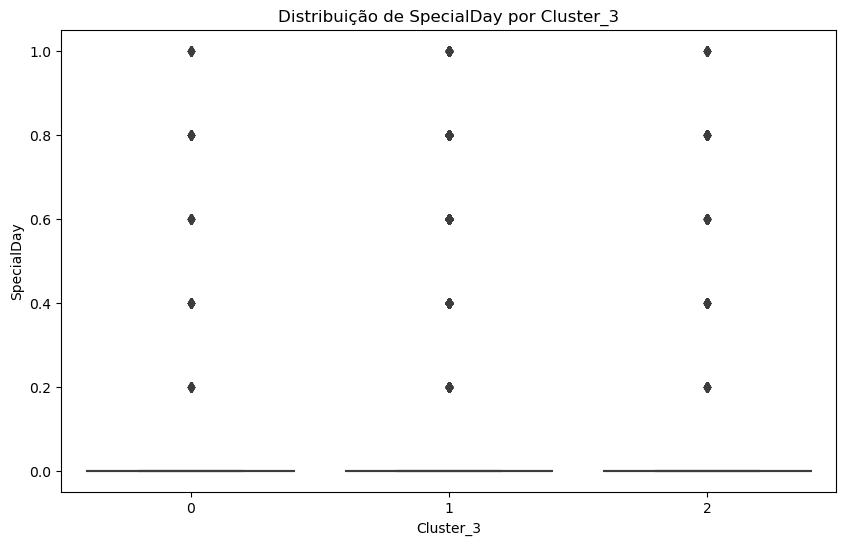

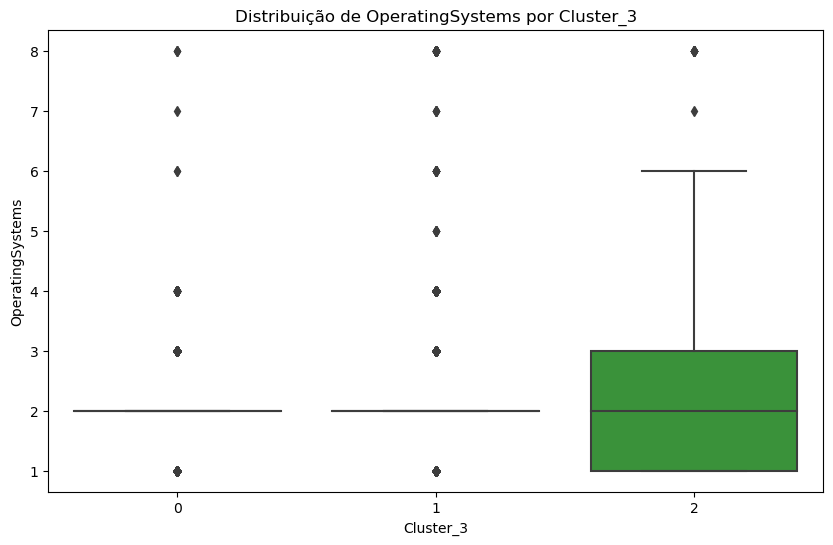

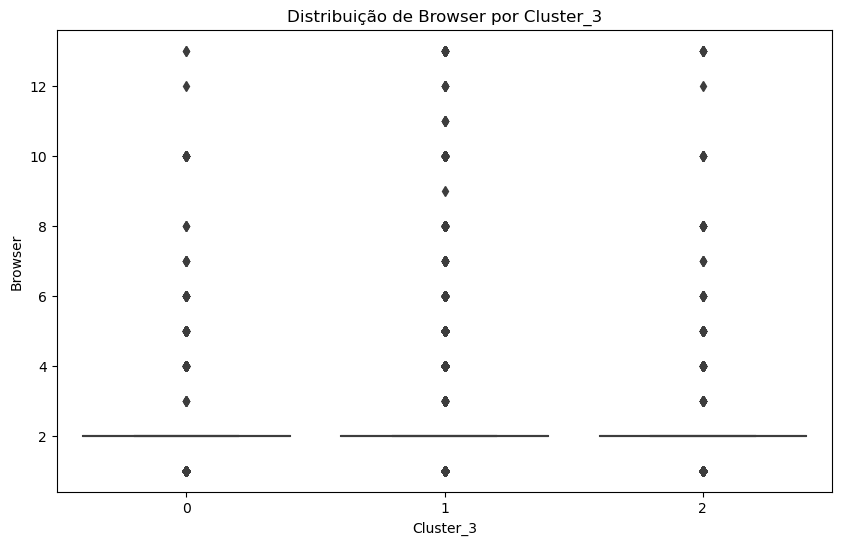

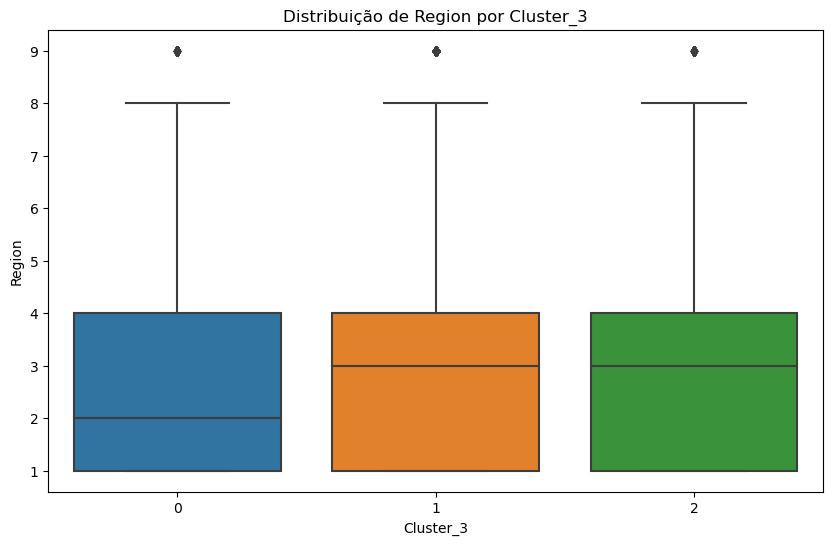

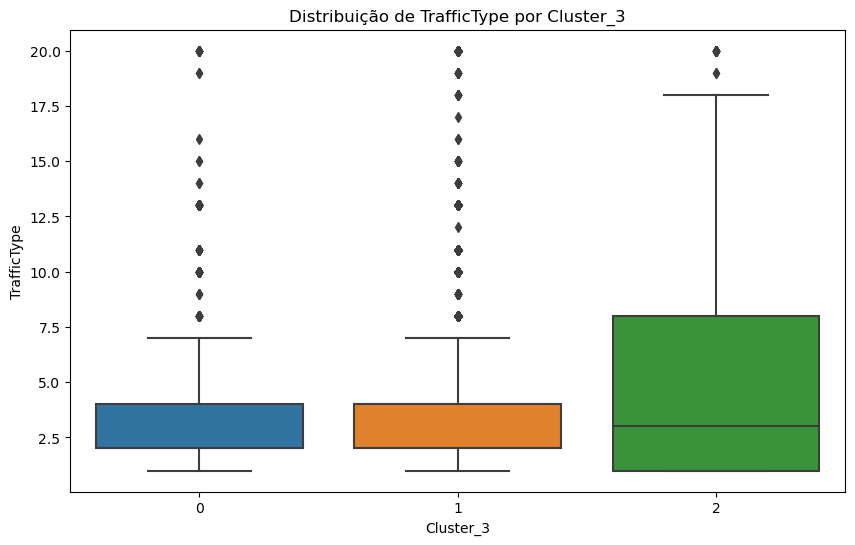

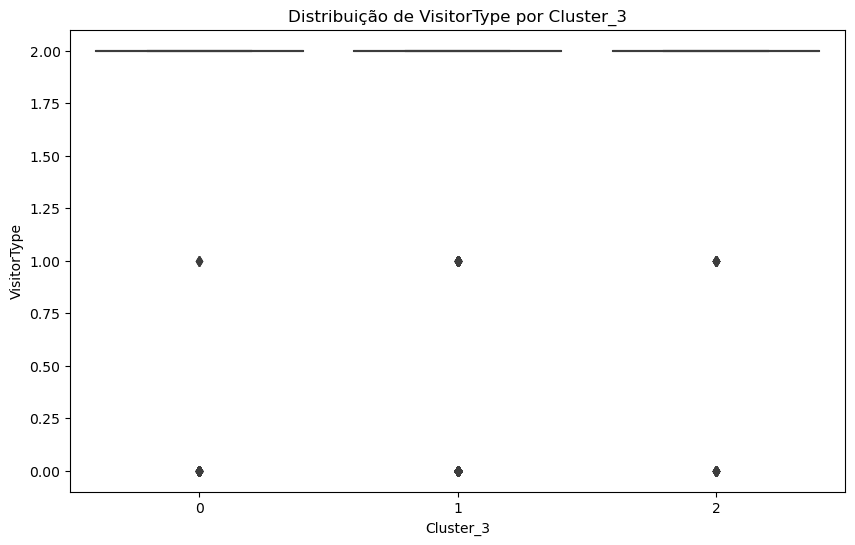

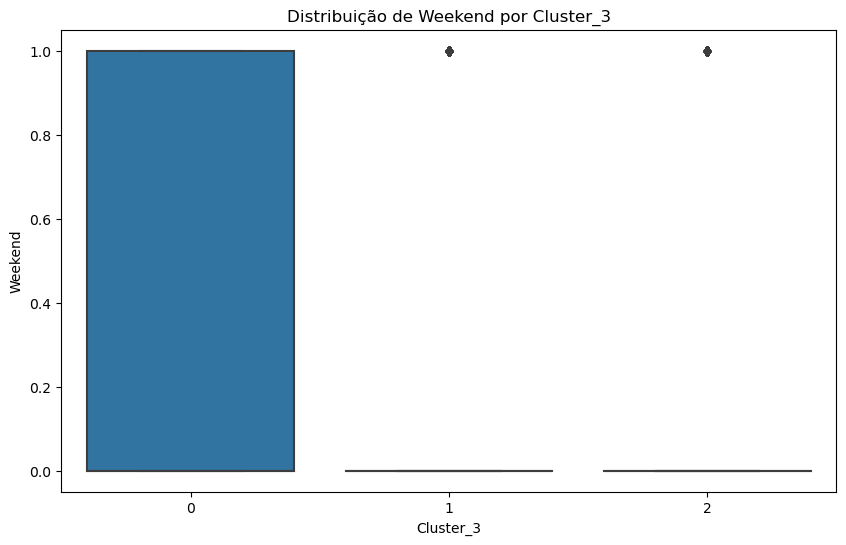

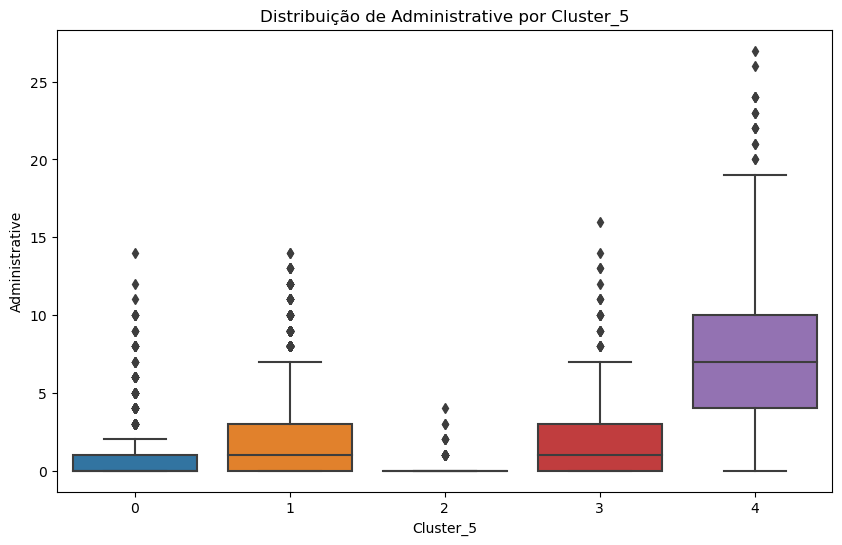

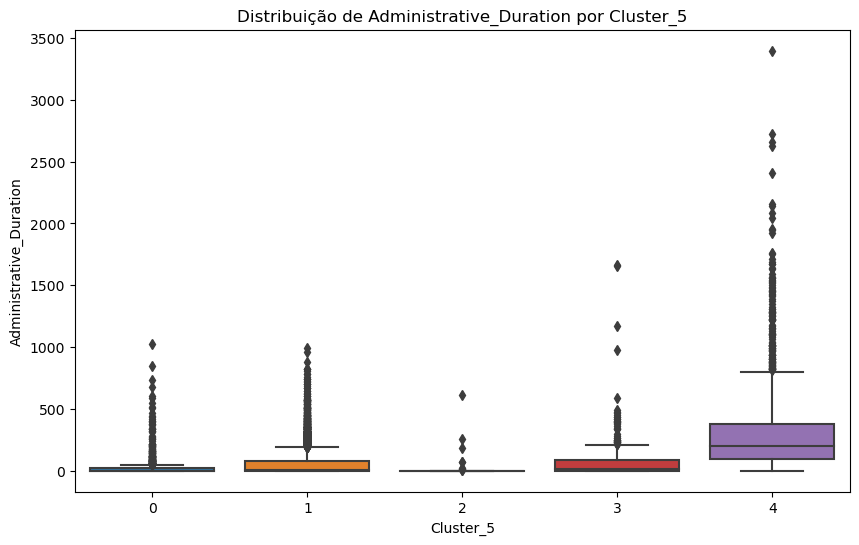

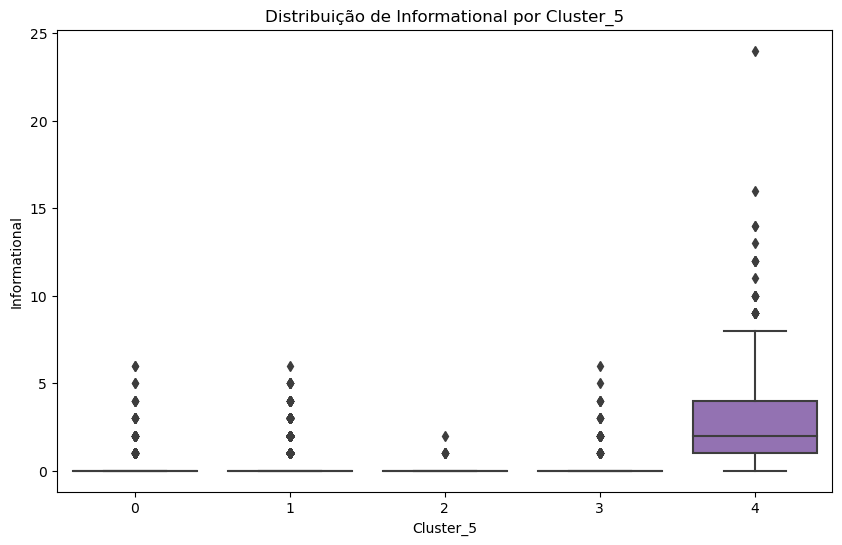

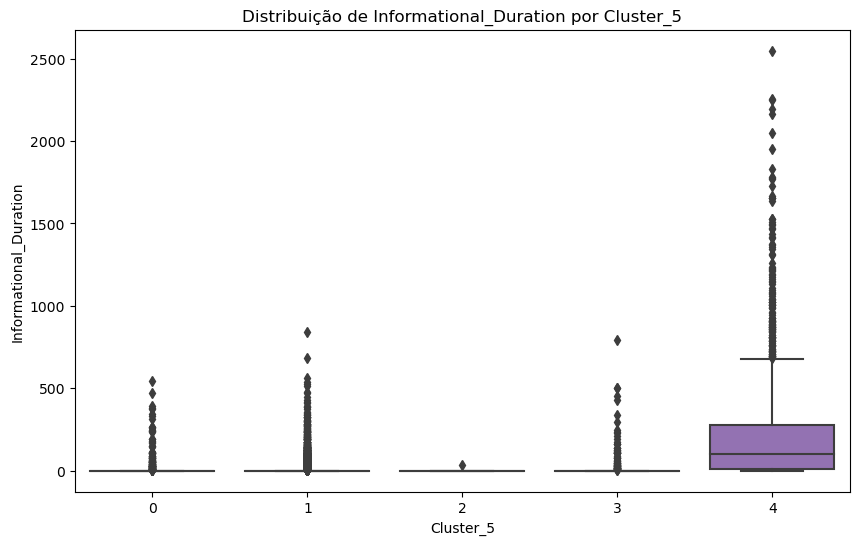

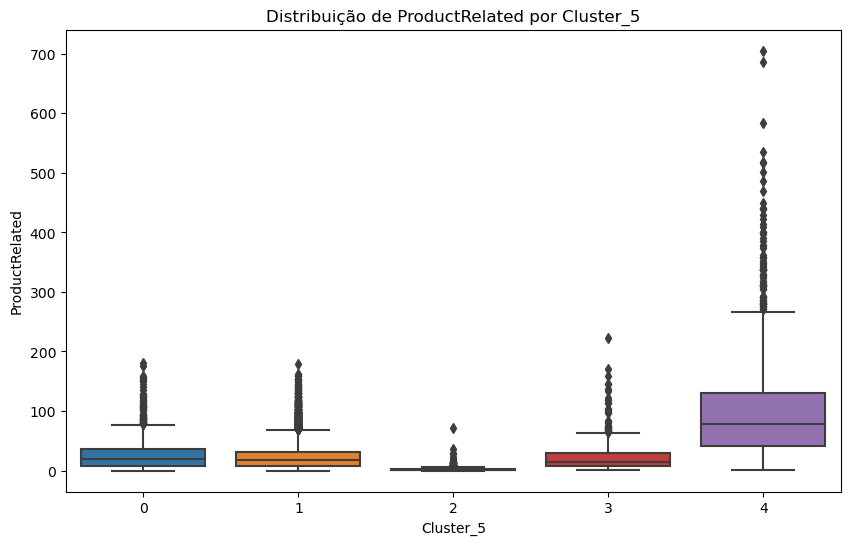

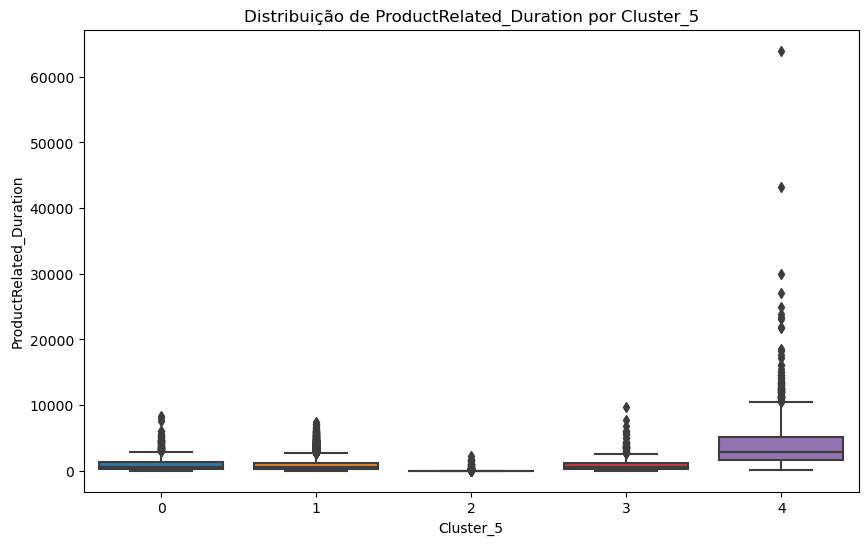

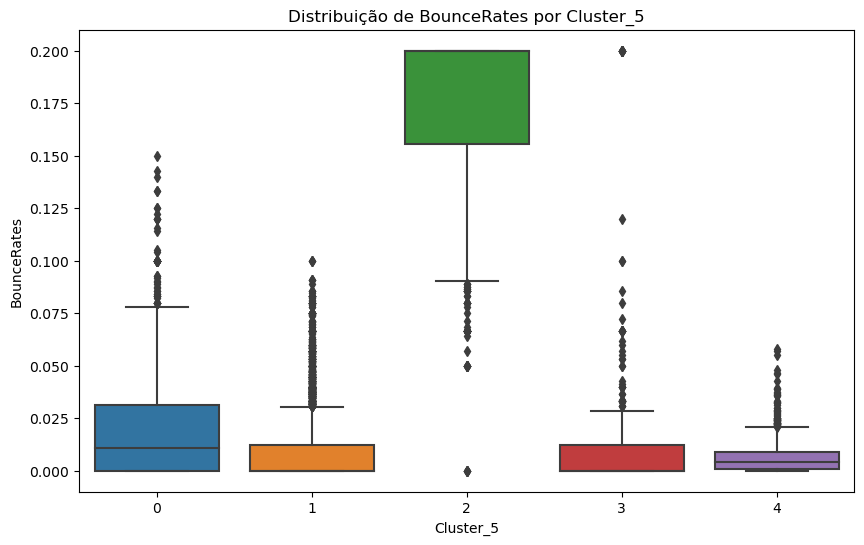

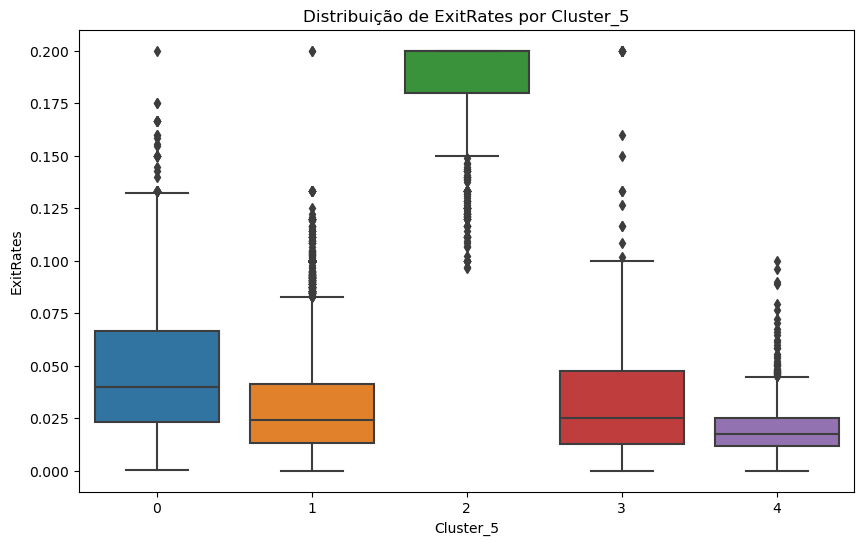

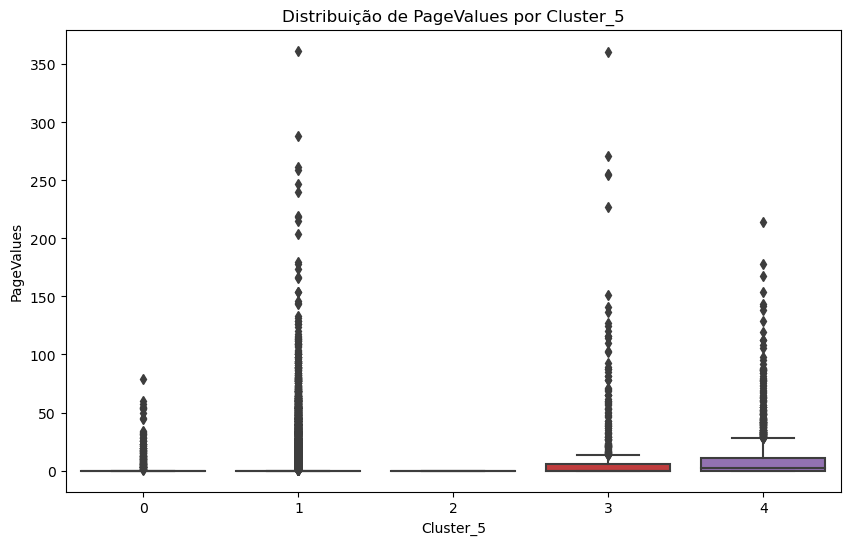

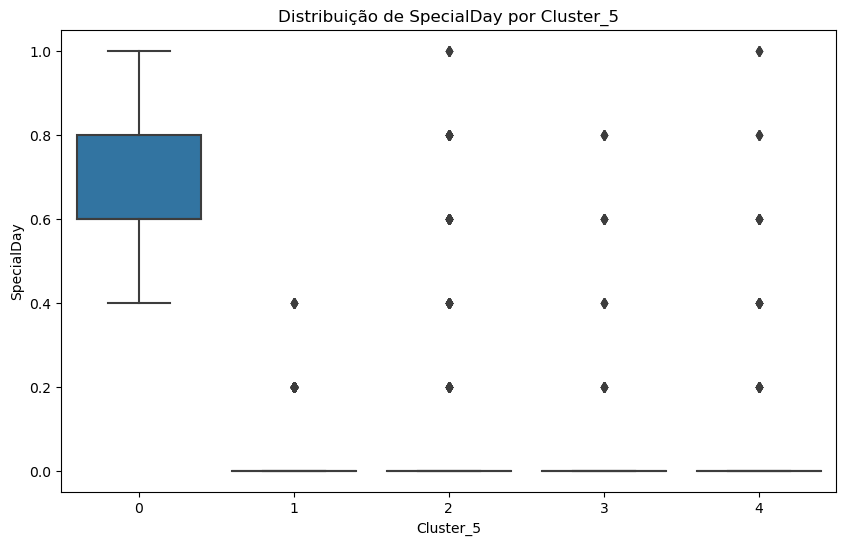

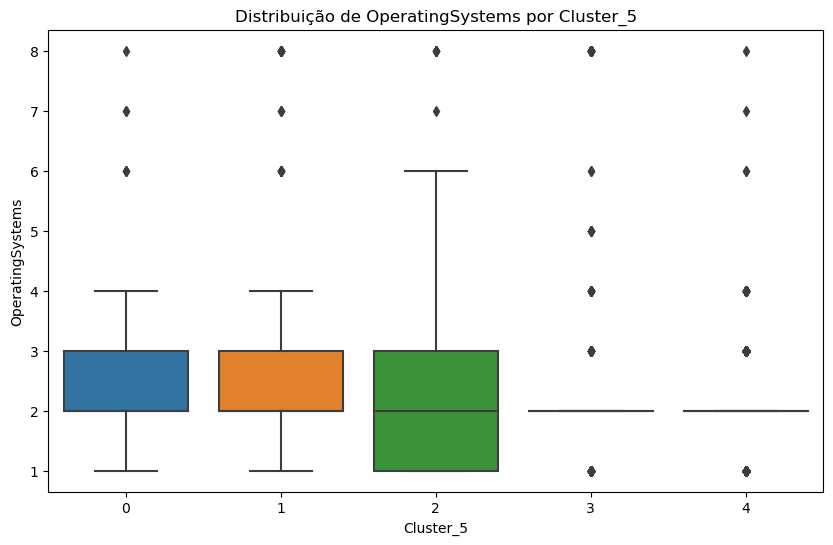

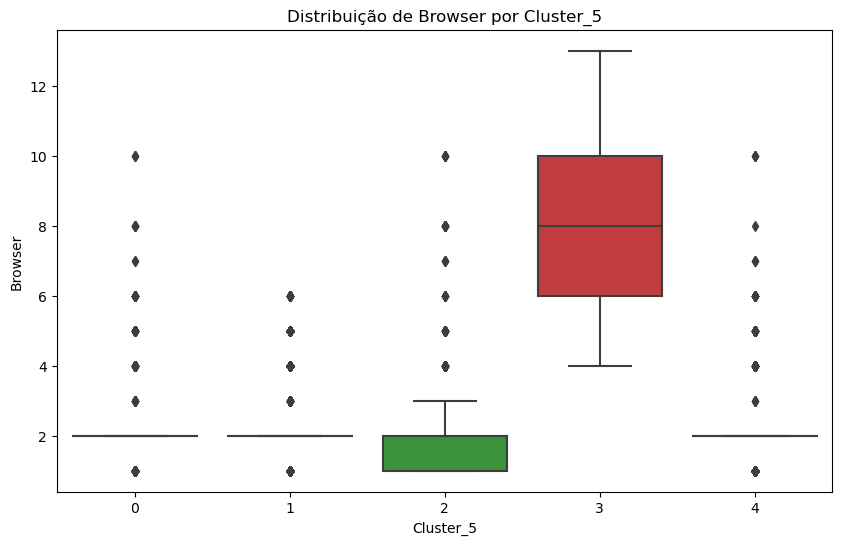

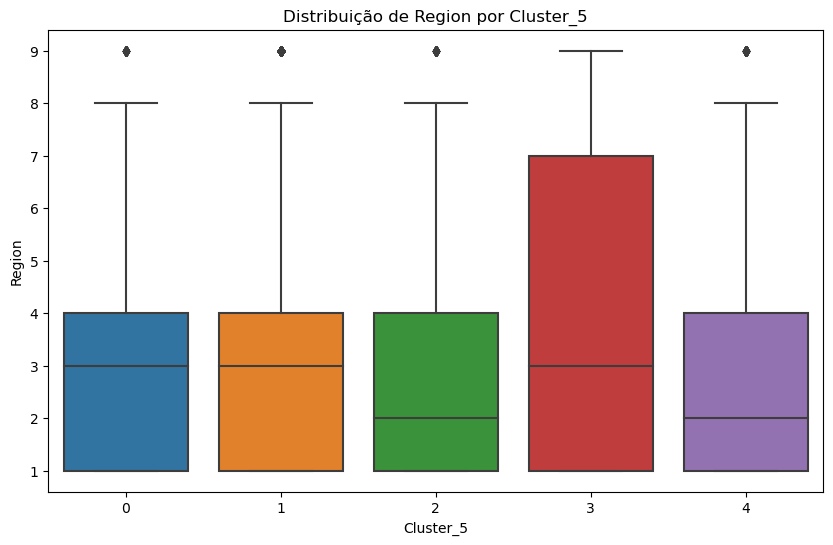

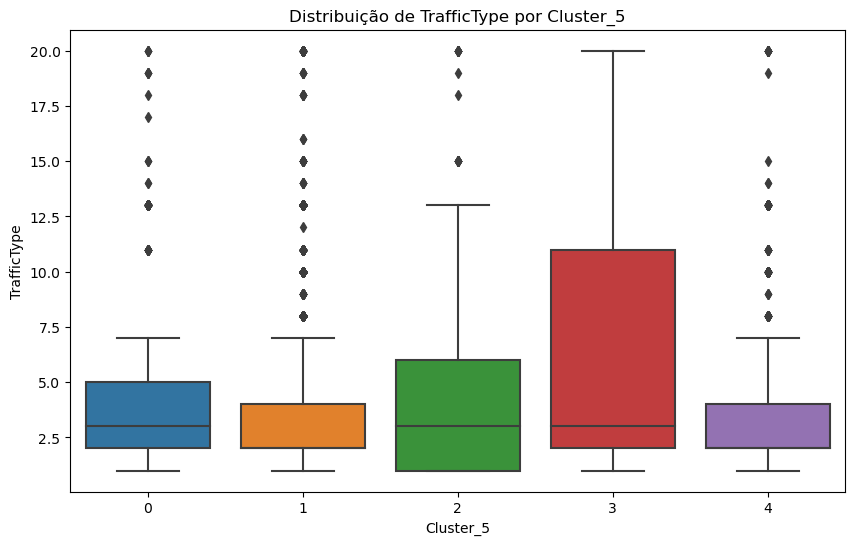

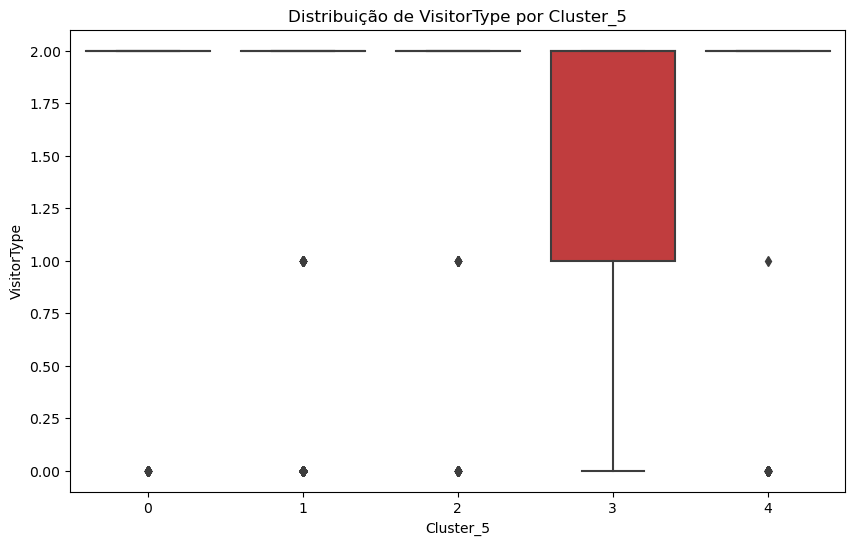

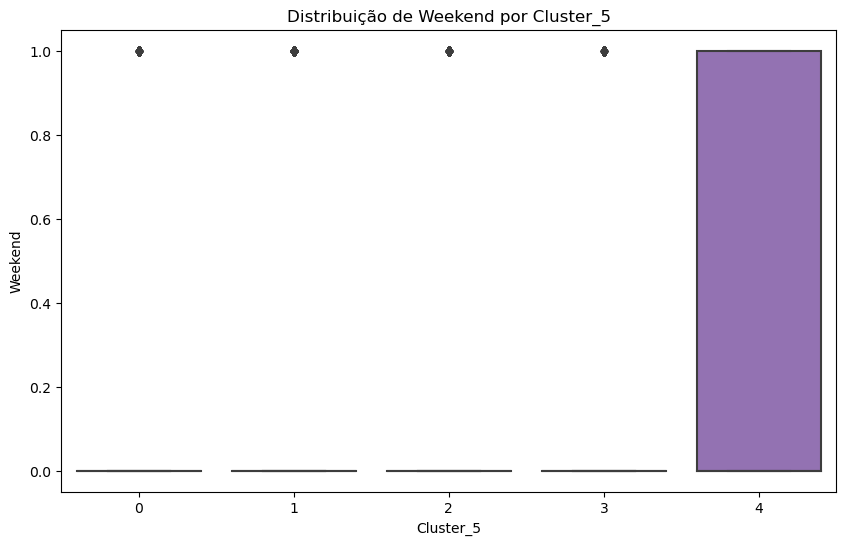

In [44]:
# Função para plotar distribuições de variáveis por cluster
def plot_cluster_distributions(df, cluster_col, variables, cluster_names=None):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cluster_col, y=var, data=df)
        plt.title(f'Distribuição de {var} por {cluster_col}')
        if cluster_names:
            plt.xticks(ticks=range(len(cluster_names)), labels=cluster_names)
        plt.show()

# Variáveis no escopo do agrupamento
variables = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'
]

# Plotar distribuições para 3 clusters
plot_cluster_distributions(df, 'Cluster_3', variables)

# Plotar distribuições para 5 clusters
plot_cluster_distributions(df, 'Cluster_5', variables)


In [45]:
# Definir o agrupamento final
df['Cluster_Final'] = df['Cluster_3']

cluster_names = {0: "Compradores Ativos", 1: "Visitantes Casuais", 2: "Usuários Regulares"}
df['Cluster_Nome'] = df['Cluster_Final'].map(cluster_names)

# Exibir a tabela final com nomes dos clusters
print(df[['Cluster_Final', 'Cluster_Nome']].head())


   Cluster_Final        Cluster_Nome
0              2  Usuários Regulares
1              1  Visitantes Casuais
2              2  Usuários Regulares
3              2  Usuários Regulares
4              1  Visitantes Casuais


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [46]:
# Calcular a média de Bounce Rate para cada grupo
bounce_rate_mean = df.groupby('Cluster_Nome')['BounceRates'].mean()

# Calcular a proporção de Revenue (percentual de compras) para cada grupo
revenue_proportion = df.groupby('Cluster_Nome')['Revenue'].mean()

# Exibir os resultados
print("Média de Bounce Rate por Grupo:")
print(bounce_rate_mean)
print("\nProporção de Revenue por Grupo:")
print(revenue_proportion)


Média de Bounce Rate por Grupo:
Cluster_Nome
Compradores Ativos    0.006211
Usuários Regulares    0.165647
Visitantes Casuais    0.009150
Name: BounceRates, dtype: float64

Proporção de Revenue por Grupo:
Cluster_Nome
Compradores Ativos    0.317451
Usuários Regulares    0.003777
Visitantes Casuais    0.142932
Name: Revenue, dtype: float64


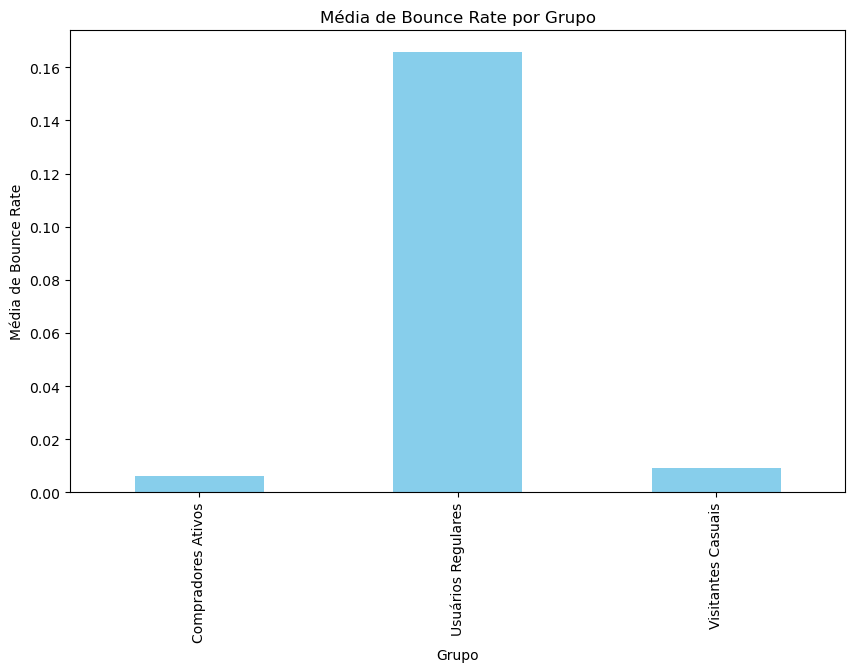

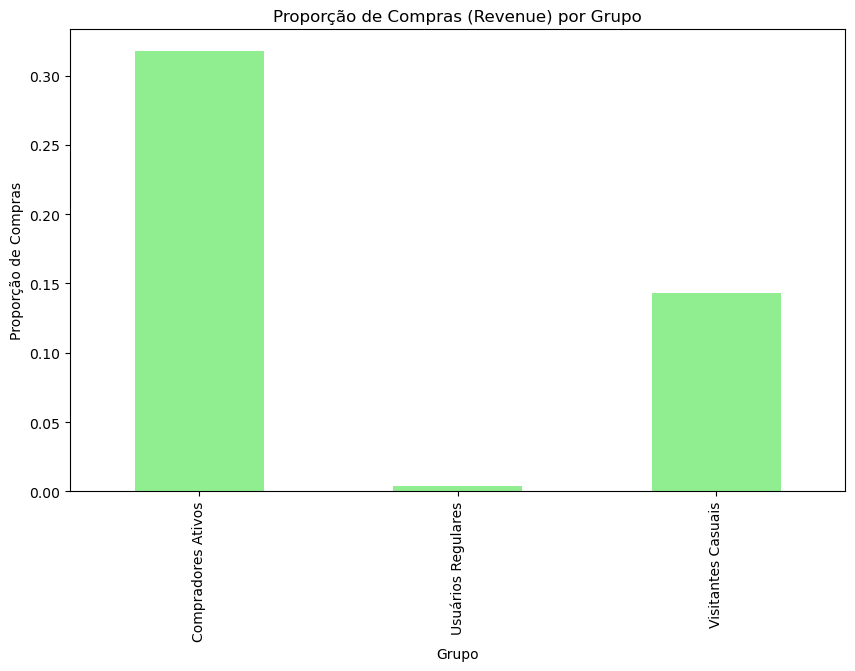

In [47]:
# Gráfico de barras para Bounce Rate
plt.figure(figsize=(10, 6))
bounce_rate_mean.plot(kind='bar', color='skyblue')
plt.title('Média de Bounce Rate por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Média de Bounce Rate')
plt.show()

# Gráfico de barras para Revenue
plt.figure(figsize=(10, 6))
revenue_proportion.plot(kind='bar', color='lightgreen')
plt.title('Proporção de Compras (Revenue) por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Proporção de Compras')
plt.show()
